In [ ]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns

In [2]:
# loading data from csv files
df1 = pd.read_csv("data/Fake.csv")
df2 = pd.read_csv("data/True.csv")

In [3]:
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Giving new column to each dataframe, and assign true for true news, fake for fake news
df1['class'] = "fake"
df2['class'] = "true"

In [6]:
# combine two datasets into one file
combine_df = pd.concat([df1,df2])
combine_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


## expoloring the dataset

In [8]:
combine_df["class"].value_counts()

fake    23481
true    21417
Name: class, dtype: int64

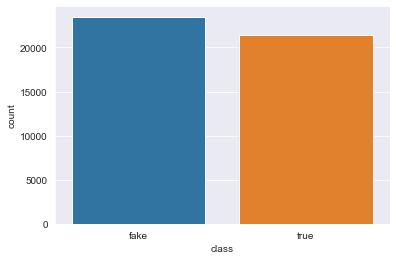

In [13]:
sns.countplot(combine_df["class"])

In [9]:
combine_df["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

# Tokenization

In [14]:
def tokeniz(text):
    token = re.split('\W+', text)
    return token
clean_df = combine_df
clean_df["token_text"] = clean_df["text"].apply(lambda x:tokeniz(x.lower()))

clean_df.head()

,title,text,subject,date,class,token_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ..."


# Remove stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/miro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopword = nltk.corpus.stopwords.words('english')

In [17]:
def remove_stopword(token):
    text = [word for word in token if word not in stopword]
    return text

clean_df["nostopword_text"] = clean_df["token_text"].apply(lambda x:remove_stopword(x))

clean_df.head()

,title,text,subject,date,class,token_text,nostopword_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ..."


# Lemmatizing

In [18]:
wl = WordNetLemmatizer()

In [19]:
def lemmatizing(stopword):
    text = [wl.lemmatize(word) for word in stopword]
    return text

clean_df["lemmatizing_text"] = clean_df["nostopword_text"].apply(lambda x:lemmatizing(x))

clean_df.head()

,title,text,subject,date,class,token_text,nostopword_text,lemmatizing_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ..."


In [53]:
clean_df.to_csv("data/clean_data.csv")

# N-Grams

In [20]:
fake_df = clean_df[(clean_df["class"] == "fake")]
true_df = clean_df[(clean_df["class"] == "true")]

In [21]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [23]:
true_word = basic_clean(''.join(str(true_df['text'].tolist())))

In [24]:
true_bigrams = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

In [33]:
bigram_t = pd.DataFrame(true_bigrams).reset_index()
bigram_t = bigram_t.rename(columns={"index":"trueBigram",0:"count"})
bigram_t

,trueBigram,count
0,"(United, States)",12176
1,"(White, House)",8269
2,"(Donald, Trump)",7963
3,"(WASHINGTON, Reuters)",6483
4,"(President, Donald)",5913
5,"(North, Korea)",5282
6,"(Reuters, The)",3921
7,"(said, statement)",3878
8,"(New, York)",3567
9,"(said, The)",3541


In [35]:
true_trigrams = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
trigram_t = pd.DataFrame(true_trigrams).reset_index()
trigram_t = trigram_t.rename(columns={"index":"trueTrigram",0:"count"})
trigram_t

,trueTrigram,count
0,"(President, Donald, Trump)",4415
1,"(US, President, Donald)",2523
2,"(President, Barack, Obama)",1959
3,"(WASHINGTON, Reuters, US)",1668
4,"(WASHINGTON, Reuters, The)",1556
5,"(President, Donald, Trumps)",1427
6,"(The, United, States)",1294
7,"(The, White, House)",1063
8,"(Reuters, US, President)",996
9,"(White, House, said)",951


In [36]:
fake_word = basic_clean(''.join(str(fake_df['text'].tolist())))

In [37]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_word, 2)).value_counts())[:20]

In [38]:
fake_trigrams = (pd.Series(nltk.ngrams(fake_word, 3)).value_counts())[:20]

In [39]:
bigram_f = pd.DataFrame(fake_bigrams).reset_index()
bigram_f = bigram_f.rename(columns={"index":"fakeBigram",0:"count"})
bigram_f

,fakeBigram,count
0,"(Donald, Trump)",13000
1,"(Hillary, Clinton)",6660
2,"(White, House)",6234
3,"(United, States)",6151
4,"(image, via)",6072
5,"(New, York)",4167
6,"(I, think)",3841
7,"(President, Obama)",3754
8,"(President, Trump)",3451
9,"(Fox, News)",2530


In [40]:
trigram_f = pd.DataFrame(fake_trigrams).reset_index()
trigram_f = trigram_f.rename(columns={"index":"fakeTrigram",0:"count"})
trigram_f

,fakeTrigram,count
0,"(Donald, J, Trump)",2111
1,"(21st, Century, Wire)",1898
2,"(J, Trump, realDonaldTrump)",1670
3,"(New, York, Times)",1464
4,"(Black, Lives, Matter)",1123
5,"(AT, 21st, Century)",983
6,"(NEWS, AT, 21st)",921
7,"(President, Barack, Obama)",819
8,"(image, via, video)",782
9,"(President, Donald, Trump)",765


# WordCloud

In [49]:
def plot_wordcloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
#     plt.savefig(f'data/image/{text}.png')

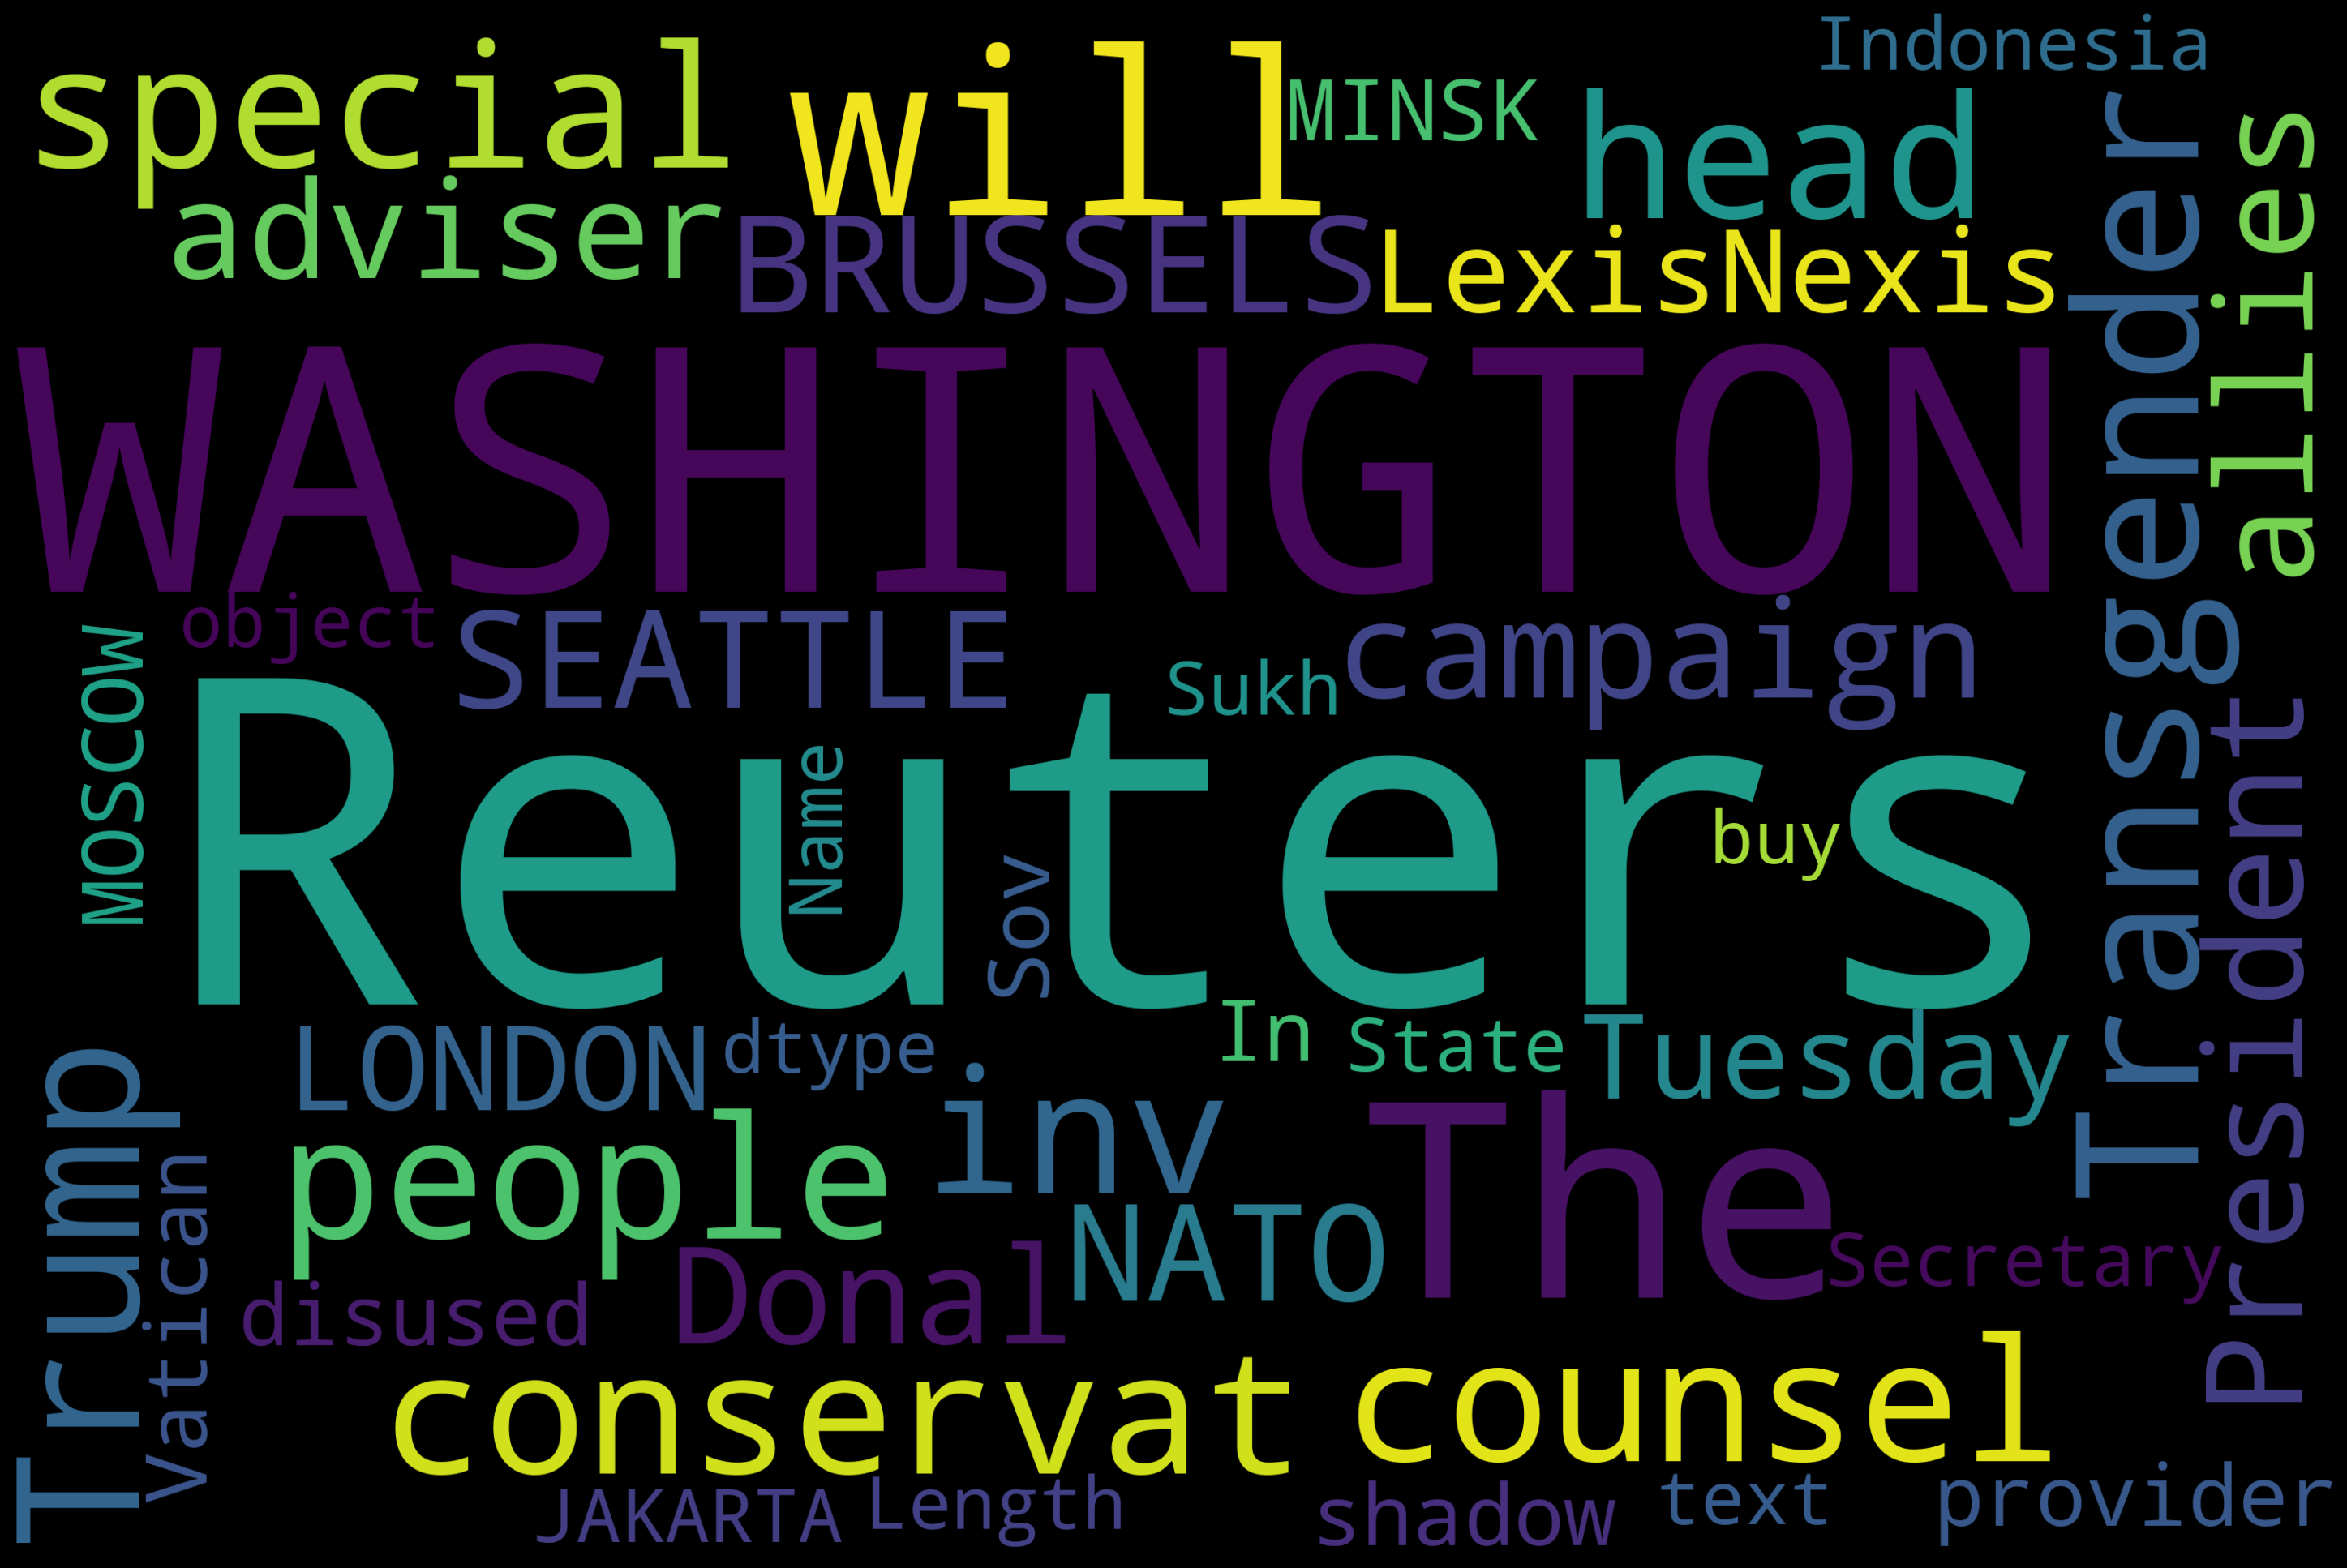

<Figure size 432x288 with 0 Axes>

In [50]:
plot_wordcloud(true_df.text)
plt.savefig("data/image/true_wordcloud.png")

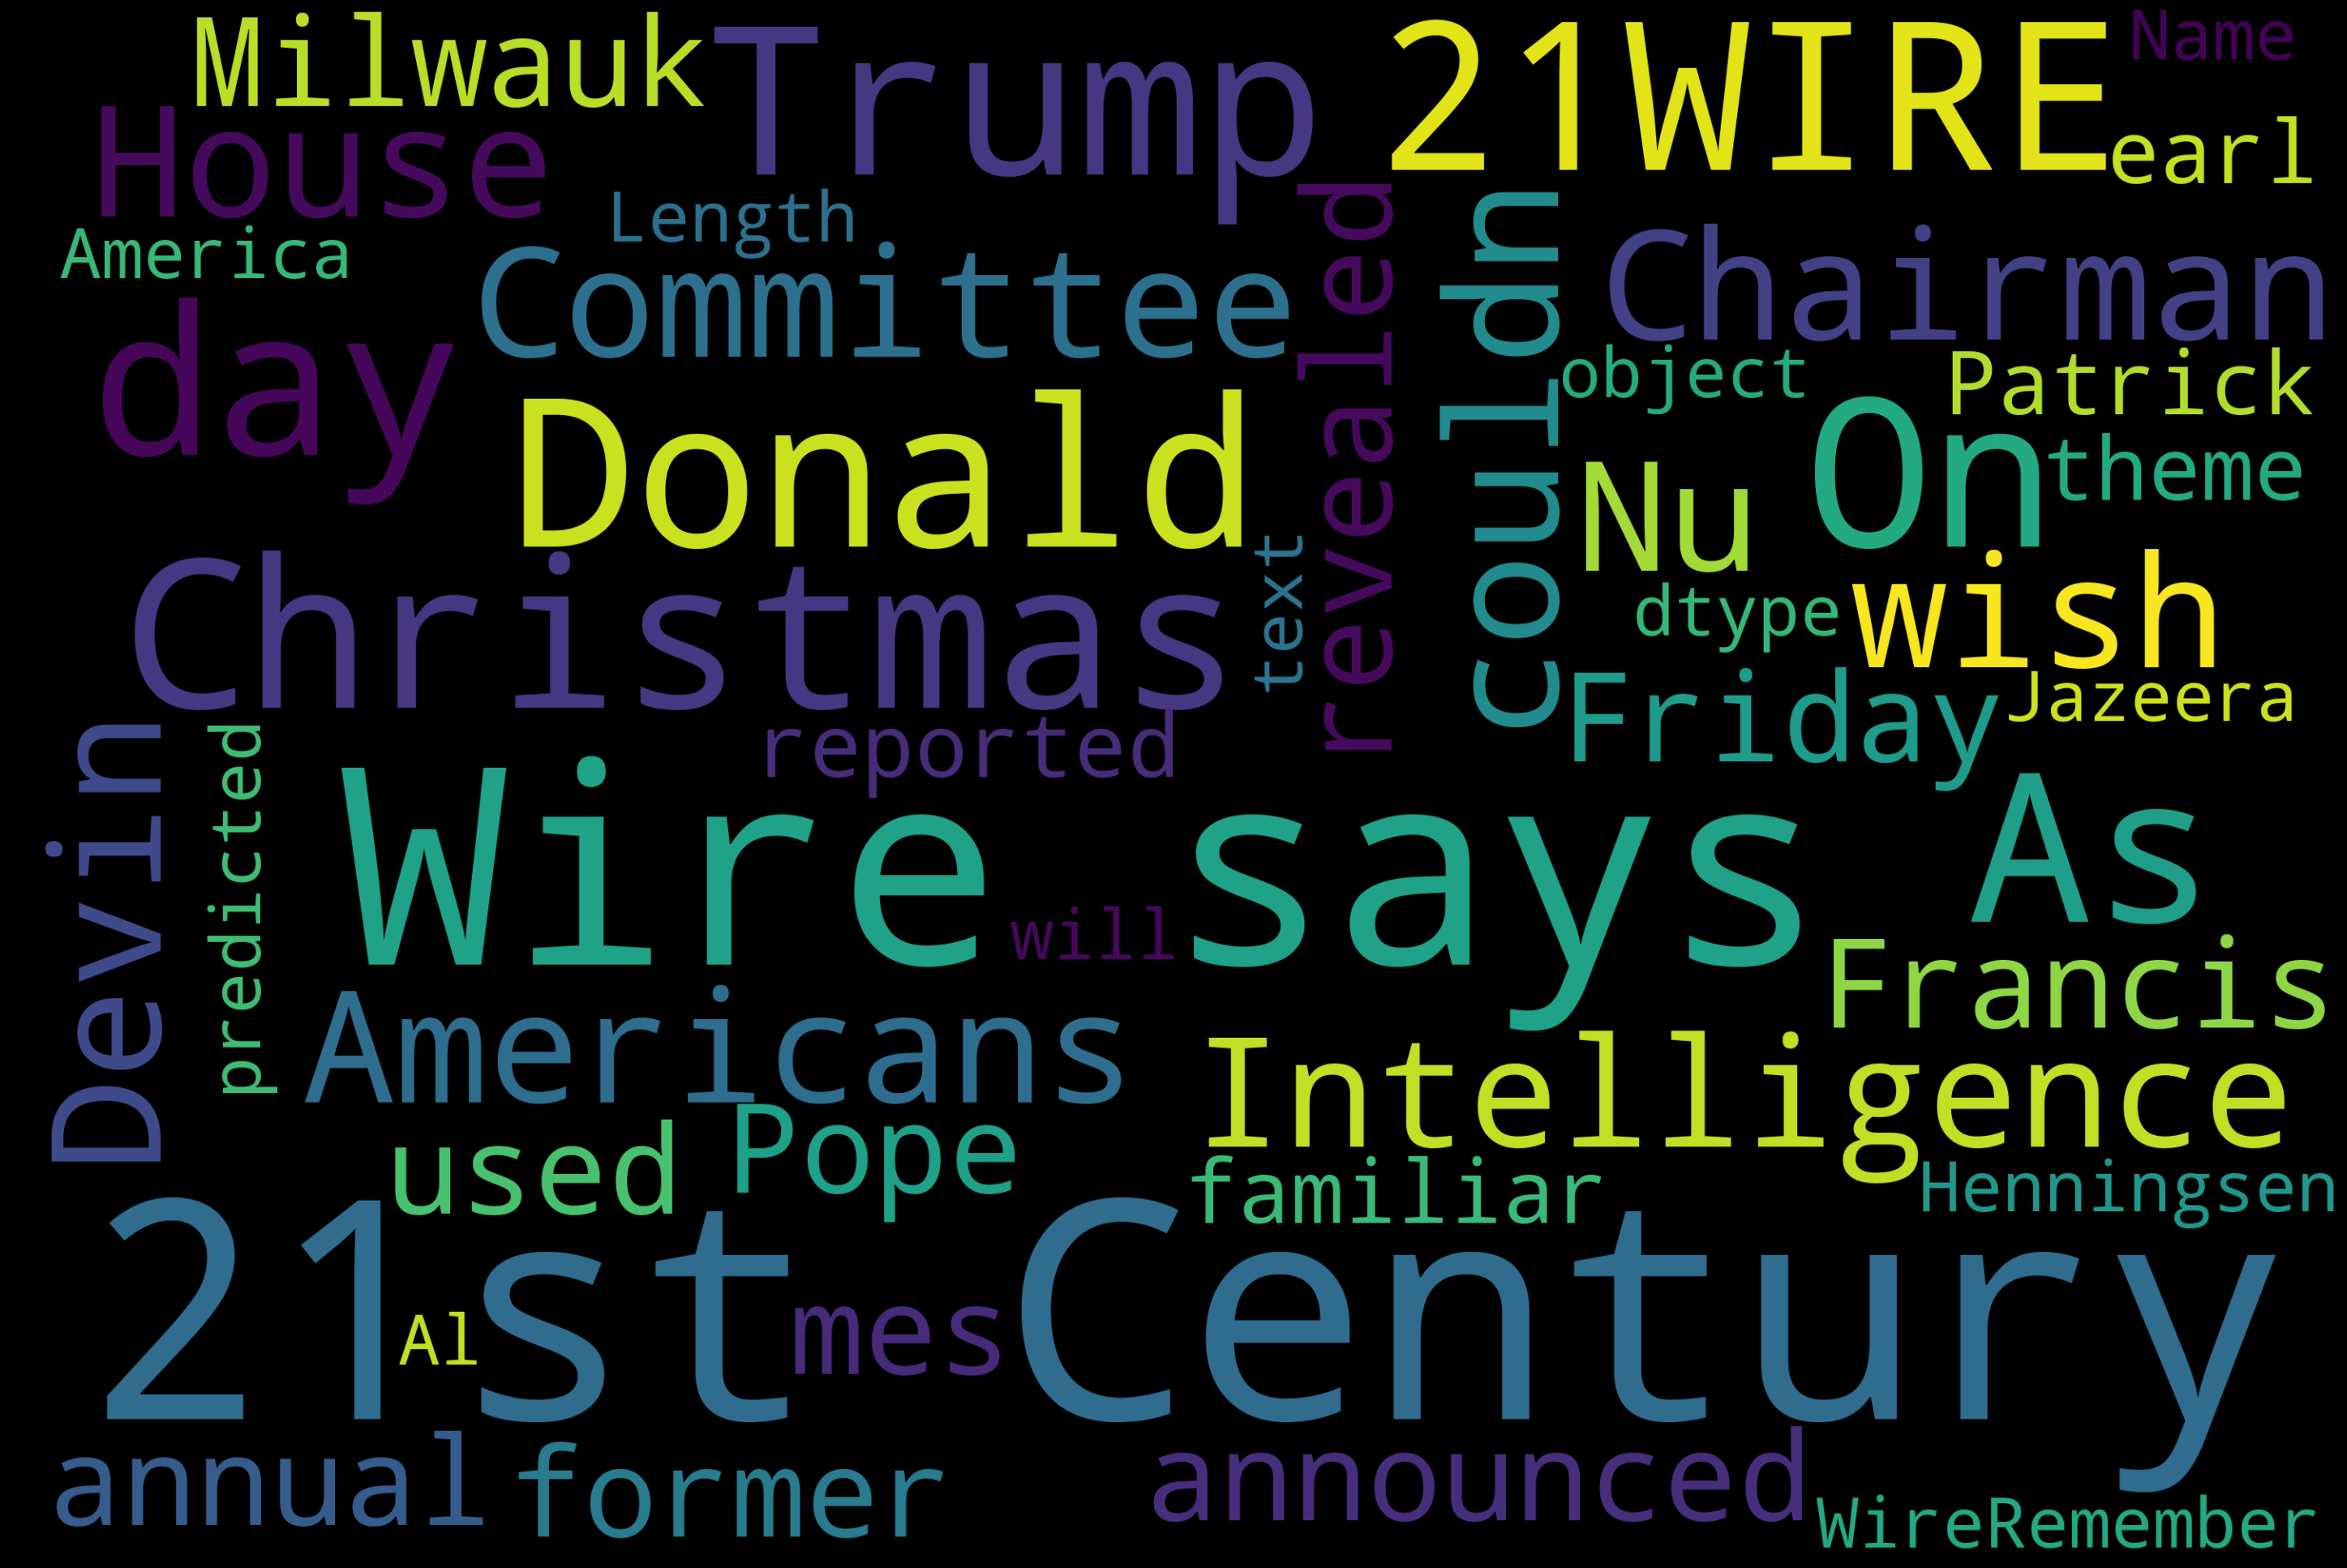

<Figure size 432x288 with 0 Axes>

In [51]:
plot_wordcloud(fake_df.text)
plt.savefig("data/image/fake_wordcloud.png")

# One Hot Encoding and Neural Networks with Keras

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = clean_df.values
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(clean_df["text"])
tfIdf

<44898x122002 sparse matrix of type '<class 'numpy.float64'>'
	with 9397629 stored elements in Compressed Sparse Row format>

In [54]:
X = tfIdf
y = data[:, 4]

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [56]:
encoded_y, y

(array([0, 0, 0, ..., 1, 1, 1]),
 array(['fake', 'fake', 'fake', ..., 'true', 'true', 'true'], dtype=object))

In [57]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y)

In [59]:
from tensorflow.keras.utils import to_categorical
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [60]:
from tensorflow.keras.models import Sequential

model = Sequential()
from tensorflow.keras.layers import Dense
number_inputs = 122002
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 488012    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 488,022
Trainable params: 488,022
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Train on 33673 samples
Epoch 1/10
33673/33673 - 67s - loss: 0.2369 - acc: 0.9579
Epoch 2/10
33673/33673 - 81s - loss: 0.0485 - acc: 0.9901
Epoch 3/10
33673/33673 - 73s - loss: 0.0199 - acc: 0.9974
Epoch 4/10
33673/33673 - 74s - loss: 0.0092 - acc: 0.9989
Epoch 5/10
33673/33673 - 67s - loss: 0.0044 - acc: 0.9998
Epoch 6/10
33673/33673 - 81s - loss: 0.0022 - acc: 0.9999
Epoch 7/10
33673/33673 - 66s - loss: 0.0012 - acc: 1.0000
Epoch 8/10
33673/33673 - 73s - loss: 7.4388e-04 - acc: 1.0000
Epoch 9/10
33673/33673 - 71s - loss: 5.0422e-04 - acc: 1.0000
Epoch 10/10
33673/33673 - 70s - loss: 3.7604e-04 - acc: 1.0000


In [64]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11225/11225 - 19s - loss: 0.0278 - acc: 0.9917
Loss: 0.02783186064830583, Accuracy: 0.9917148947715759


### loading new datasets

In [137]:
new_database = pd.read_csv("data/fake-news/train.csv")

In [152]:
new_database

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [138]:
new_true = new_database[new_database["label"] == 1]
new_fake = new_database[new_database["label"] == 0]

In [139]:
new_true = new_true.reset_index()
new_true

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
2,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
3,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
4,6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
...,...,...,...,...,...,...
10408,20788,20788,Maine’s Gov. LePage Threatens To ‘Investigate’...,Joe Clark,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
10409,20791,20791,Lawyer Who Kept Hillary Campaign Chief Out of ...,Daniel Greenfield,Lawyer Who Kept Hillary Campaign Chief Out of ...,1
10410,20793,20793,Idiot Who Destroyed Trump Hollywood Star Gets ...,Robert Rich,Share This \nAlthough the vandal who thought i...,1
10411,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [146]:
new_fake = new_fake.reset_index()
new_fake

,index,id,title,author,text,label
0,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
1,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
2,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
3,8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
4,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
...,...,...,...,...,...,...
10382,20792,20792,"Jakarta Bombing Kills Three Police Officers, L...",John Hayward,Two suicide bombers attacked a bus station in ...,0
10383,20794,20794,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Lee Stranahan,Donald Trump took to Twitter Friday to praise ...,0
10384,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
10385,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0


### test the model with new data

In [111]:
def findClass(new_data):
    new_tfidf = tfIdfVectorizer.transform([new_data])
#     new_tfidf.sort_indices()
    new_pred = model.predict_classes(new_tfidf)
    return new_pred[0]

In [143]:
findClass(str(new_true['text'][0]))

0

In [112]:
findClass(str(df1['text'][0]))

0

In [115]:
findClass(str(df2['text'][0]))

1

In [154]:
true_total = 0
for i in range(len(df2['text'])):
    if findClass((df2['text'][i]))== 1:
        true_total += 1
    else:
        true_total += 0
print(len(df2["text"]), true_total)

21417 21366


In [127]:
true_total/len(df2['text'])

0.9976187141056171

In [129]:
fake_total = 0
for i in range(len(df1['text'])):
    if findClass((df1['text'][i]))== 0:
        fake_total += 1
    else:
        fake_total += 0
print(fake_total)

23438


In [130]:
fake_total/len(df1['text'])

0.9981687321664324

In [160]:
df2.head(1)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true


In [164]:
findClass(str(df2['text'][1]))

1

In [166]:
new_true.head(2)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [165]:
findClass(str(new_true['text'][1]))

0

In [144]:
test_total = 0
for i in range(len(new_true['text'])):
    if findClass(str(new_true['text'][i]))== 1:
        test_total += 1
    else:
        test_total += 0
print(test_total)

768


In [145]:
test_total/len(new_true['text'])

0.07375396139441083

In [148]:
len(new_true['text'])

10413

In [150]:
test_total_1 = 0
for i in range(len(new_fake['text'])):
    if findClass(str(new_fake['text'][i]))== 0:
        test_total_1 += 1
    else:
        test_total_1 += 0

print(test_total_1)

7478


In [151]:
test_total_1/len(new_fake['text'])

0.7199383845191104